In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
from expense_stream_data import *

In [3]:
x = cp.Variable(shape=(m,1))
b = cp.Variable(shape=(n+1,1))
w = cp.Variable(shape=(n,1))

In [4]:
constraints = [b>=0, b[1:n+1] == (1+rho)*b[0:n]-w[0:n], w+P@x >= e, x>=0, w>=0]

In [5]:
optimal_cost = 0
def optimise():
    global optimal_cost
    objective = cp.Minimize(b[0,0]+ cp.sum(x))
    optimal_cost = cp.Problem(objective, constraints).solve()
optimise()

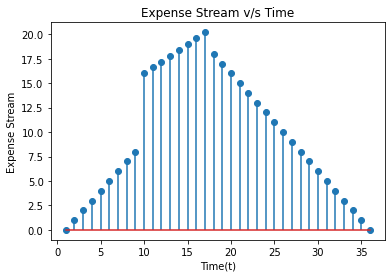

In [6]:
plt.stem(np.arange(1,n+1), e)
plt.xlabel("Time(t)")
plt.ylabel("Expense Stream")
plt.title("Expense Stream v/s Time")
plt.show()

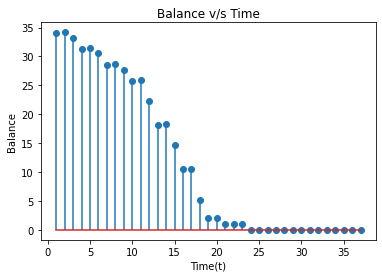

In [7]:
plt.stem(np.arange(1,n+2), b.value)
plt.xlabel("Time(t)")
plt.ylabel("Balance")
plt.title("Balance v/s Time")
plt.show()

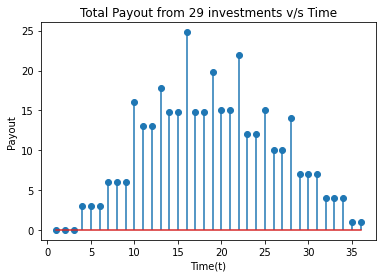

In [8]:
plt.stem(np.arange(1,n+1), P@x.value)
plt.xlabel("Time(t)")
plt.ylabel("Payout")
plt.title(f"Total Payout from {m} investments v/s Time")
plt.show()

In [9]:
with open('output.txt', 'w') as f:
    optimise()
    f.write(f'Minimum initial investment is {optimal_cost} with non-zero outside investments.\n')
    constraints.append(x==0)
    optimise()
    constraints.pop()
    f.write(f'Minimum initial investment is {optimal_cost} with zero outside investments')
    optimise()